In [1]:
# General tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
p = print
d = display

In [2]:
import sys
sys.path.append("D:/Dropbox/DataScience")
from my_utilities import my_utils as my

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
import pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb+') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [5]:
pd.set_option("precision", 2)
ncaa_dir = ''  # so can easily modified later

https://www.kaggle.com/c/march-machine-learning-mania-2017

> based on blog: https://www.kdnuggets.com/2017/03/machine-learning-march-madness.html

> notebook: https://github.com/adeshpande3/March-Madness-2017/blob/master/March%20Madness%202017.ipynb

# Data

In [6]:
def get_data(fname):
  teams_df = pd.read_csv(ncaa_dir + fname + '.csv')
  p(fname + '_df', teams_df.shape)
  d(teams_df.head())
  return teams_df

## 1. Teams

FirstD1Season: Team first participation year

LastD1Season: Team last participation year

Because March Madness games are for Division-I game, each team might appear/disappear in each year.

In [7]:
teams_df = get_data('teams')

teams_df (364, 2)


,Team_Id,Team_Name
0,1101,Abilene Chr
1,1102,Air Force
2,1103,Akron
3,1104,Alabama
4,1105,Alabama A&M


In [9]:
teams_df[teams_df.Team_Name.str.find('Okl') >= 0]

,Team_Id,Team_Name
226,1327,Okla City
227,1328,Oklahoma
228,1329,Oklahoma St


## 2. Seasons

DayZero: All game dates have been aligned upon a common scale so that (each year) the Monday championship game of the men's tournament is on DayNum=154.

RegionW, RegionX, Region Y, Region Z: Tournament proceeds with dividing US in 4 regions, but this division changes in year. These RegionW, X, Y, Z column represents 4 regions of each year. Note that RegionW & X, Y & Z have matchup in semifinals. Winner of WX and YZ regions have the final championship matchup.

In [10]:
seasons_df = get_data('seasons')

seasons_df (33, 6)


,Season,Dayzero,Regionw,Regionx,Regiony,Regionz
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


## 3. Seeds

Seed column string consists of Region (W, X, Y, Z) + seed number (01 ~ 16). Seed number 01 is considered as most "strong". For play-in games, which occurs before main tournament, fourth character (a or b) is added.

Before tournament, 68 teams will be reduced to 64 teams, so 4 teams have pre-tournament match up. "a" and "b" is the match up of those teams.

In [11]:
tourneySeeds_df = get_data('tourneySeeds')

tourneySeeds_df (2150, 3)


,Season,Seed,Team
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [12]:
year = 2016
team = 1104  # alabama
team = 1328  # Oklahoma
#team = 1329  # Oklahoma St

mask = (tourneySeeds_df.Season == year) & (tourneySeeds_df.Team == team)
tourneySeeds_df[mask].Seed.str[1:]

2066    02
Name: Seed, dtype: object

## 4. Regular Season Results

For each year, we have regular season at first, and only 68 teams survive for NCAA tournament, also called March Madness (In parallel, some teams who cannot proceed March Madness participates Secondary tournament). The game result of these 3 are stored in separated files.

"Compact results" data stores important information for win/lose, while "Detailed results" data (explained later) stores much precise information. Let's see Compact results data here.

Store matchup date, winner/loser's team id & score.

Wteam: id of winning team
Lteam: id of loosing team
WScore: is the winner score at the end of game
LScore: is the loser score at the end of game
WLoc: the "location" of winning team, either ("H", "A", "N") - "H" is home, "A" is Away (visiting to opponent's site), "N" is neutral court.
NumOT: the number of overtime periods (when the score is same after 4-period of game, we continue the game with overtime period in basketball.)

The 4 columns, Season, DayNum, WTeamID and LTeamID uniquely identifies the game. This fact is very important when you want to merge information of other files.

In [13]:
regularSeasonCompactResults_df = get_data('regularSeasonCompactResults')

regularSeasonCompactResults_df (150684, 8)


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


### Detailed

This section provides game-by-game stats at a team level (free throws attempted, defensive rebounds, turnovers, etc.) for all regular season, conference tournament, and NCAA® tournament games since the 2002-03 season.

Team Box Scores are provided in "Detailed Results" files rather than "Compact Results" files.

Compact results are collected from 1985, but details results are collected since 2003, so the number of rows in the data are different.

But 8 columns (Season, DayNum, WTeamID, WScore, LTeamID, LScore, WLoc, and NumOT) are exactly same value with CompactResults file.

Additional columns stores more precise information:

WFGM - field goals made (by the winning team)
WFGA - field goals attempted (by the winning team)
WFGM3 - three pointers made (by the winning team)
WFGA3 - three pointers attempted (by the winning team)
WFTM - free throws made (by the winning team)
WFTA - free throws attempted (by the winning team)
WOR - offensive rebounds (pulled by the winning team)
WDR - defensive rebounds (pulled by the winning team)
WAst - assists (by the winning team)
WTO - turnovers committed (by the winning team)
WStl - steals (accomplished by the winning team)
WBlk - blocks (accomplished by the winning team)
WPF - personal fouls committed (by the winning team)

same set of stats from the perspective of the losing team starting with "L".

For example in top row WFGM=27, WFGM3=3, WFTM=11 and WScore=68.

This means (27-3)=24 goals with 2 points shot, 3 goals with 3 points shot, and 11 goals with 1 point free throw shot.
In total 24 * 2 + 3 * 3 + 11 * 1 = 68.

In [14]:
regularSeasonDetailedResults_df = get_data('regularSeasonDetailedResults')

regularSeasonDetailedResults_df (76636, 34)


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [15]:
#get # wins of a team for a given year
df = regularSeasonDetailedResults_df
# data for each game in a given year
df_year = df[df.Season == year]
# data for the team in that year
df_team = df_year[(df_year.Wteam == team) | (df_year.Lteam == team)]
numGames = len(df_team)

# data for games won/lost in that year
df_games_won = df_team[df_team.Wteam == team]
numWins = len(df_games_won)
totPtsWin = df_games_won.Wscore.sum()
avgPtsWin = totPtsWin / numWins
tot3ptsWin = df_games_won.Wfgm3.sum()
avg3ptsWin = tot3ptsWin / numWins 

df_games_lost = df_team[df_team.Lteam == team]
numLoses = len(df_games_lost)
totPtsLoss = df_games_lost.Lscore.sum()
avgPtsLoss = totPtsLoss / numLoses
avg3ptsLoss = df_games_lost.Lfgm3.mean()

avgPtsGame= (totPtsWin + totPtsLoss) / numGames 
totTotPtsGame = totPtsWin + totPtsLoss
avgTotPtsGame = totTotPtsGame / numGames
avg3ptsGame = (df_team.Wfgm3 + df_team.Wfgm3).mean()

format_ =  ':\t{} {} {:0.2f}'
p('Tot'+ format_.format(numGames, avgPtsGame, avgTotPtsGame))
p('Win'+ format_.format(numWins, totPtsWin, avgPtsWin))
p('Loss'+ format_.format(numLoses, totPtsLoss, avgPtsLoss))

Tot:	32 80.40625 80.41
Win:	25 2056 82.24
Loss:	7 517 73.86


In [16]:
df_team.columns

Index(['Season', 'Daynum', 'Wteam', 'Wscore', 'Lteam', 'Lscore', 'Wloc',
       'Numot', 'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr',
       'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf', 'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3',
       'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf'],
      dtype='object')

In [17]:
numWins = len(df_games_won)
wins = {'Wins': numWins}
for col in ['Wscore', 'Wallow', 'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr',
       'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf']:
  col_ = col if col != 'Wallow' else 'Lscore'
  colTot = df_games_won[col_].sum()
  wins[col] = (colTot, colTot / numWins)
p(wins)
numLoses = len(df_games_lost)  
losses = {'Losses': numLoses}
for col in ['Lscore', 'Lallow', 'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3',
       'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']:
  col_ = col if col != 'Lallow' else 'Wscore'
  colTot = df_games_lost[col_].sum()
  losses[col] = (colTot, colTot / numLoses) 
p(losses)
numGames = numWins + numLoses
games = {'Games': numGames}
for col in ['Lscore', 'Lallow', 'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3',
       'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']:
  col_ = col[1:]
  colTot = wins['W' + col_][0] + losses[col][0]
  colAvg = colTot / numGames 
  games['G' + col_] = (colTot, colAvg)
p(games)

{'Wins': 25, 'Wscore': (2056, 82.24), 'Wallow': (1697, 67.88), 'Wfgm': (711, 28.44), 'Wfga': (1499, 59.96), 'Wfgm3': (258, 10.32), 'Wfga3': (591, 23.64), 'Wftm': (376, 15.04), 'Wfta': (520, 20.8), 'Wor': (268, 10.72), 'Wdr': (725, 29.0), 'Wast': (384, 15.36), 'Wto': (325, 13.0), 'Wstl': (183, 7.32), 'Wblk': (140, 5.6), 'Wpf': (404, 16.16)}
{'Losses': 7, 'Lscore': (517, 73.85714285714286), 'Lallow': (557, 79.57142857142857), 'Lfgm': (173, 24.714285714285715), 'Lfga': (429, 61.285714285714285), 'Lfgm3': (76, 10.857142857142858), 'Lfga3': (193, 27.571428571428573), 'Lftm': (95, 13.571428571428571), 'Lfta': (127, 18.142857142857142), 'Lor': (75, 10.714285714285714), 'Ldr': (174, 24.857142857142858), 'Last': (81, 11.571428571428571), 'Lto': (90, 12.857142857142858), 'Lstl': (38, 5.428571428571429), 'Lblk': (28, 4.0), 'Lpf': (134, 19.142857142857142)}
{'Games': 32, 'Gscore': (2573, 80.40625), 'Gallow': (2254, 70.4375), 'Gfgm': (884, 27.625), 'Gfga': (1928, 60.25), 'Gfgm3': (334, 10.4375), 'G

In [18]:
wins_df = pd.DataFrame(wins)
wins_df.drop(0, axis=0, inplace=True)
wins_df['Team'] = team
wins_df

,Wins,Wscore,Wallow,Wfgm,Wfga,Wfgm3,Wfga3,Wftm,Wfta,Wor,Wdr,Wast,Wto,Wstl,Wblk,Wpf,Team
1,25,82.24,67.88,28.44,59.96,10.32,23.64,15.04,20.8,10.72,29.0,15.36,13.0,7.32,5.6,16.16,1328


In [19]:
losses_df = pd.DataFrame(losses)
losses_df.drop(0, axis=0, inplace=True)
losses_df['Team'] = team
losses_df

,Losses,Lscore,Lallow,Lfgm,Lfga,Lfgm3,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf,Team
1,7,73.86,79.57,24.71,61.29,10.86,27.57,13.57,18.14,10.71,24.86,11.57,12.86,5.43,4.0,19.14,1328


In [20]:
games_df = pd.DataFrame(games)
games_df.drop(0, axis=0, inplace=True)
games_df['Team'] = team
games_df['Games'] = numWins
games_df

,Games,Gscore,Gallow,Gfgm,Gfga,Gfgm3,Gfga3,Gftm,Gfta,Gor,Gdr,Gast,Gto,Gstl,Gblk,Gpf,Team
1,25,80.41,70.44,27.62,60.25,10.44,24.5,14.72,20.22,10.72,28.09,14.53,12.97,6.91,5.25,16.81,1328


In [23]:
mask = (tourneySeeds_df.Season == year) & (tourneySeeds_df.Team == team)
seed = int(tourneySeeds_df[mask].Seed.str[1:])
games_df['Seed'] = seed 

## 5. Tournament Results

Same format as regular season file
For tournament all games are neutral site (so WLoc is always N).

In [24]:
tourneyCompactResults_df = get_data('tourneyCompactResults')

tourneyCompactResults_df (2050, 8)


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [25]:
tourneyDetailedResults_df = get_data('tourneyDetailedResults')

tourneyDetailedResults_df (914, 34)


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [26]:
tourneyDetailedResults_df[(tourneyDetailedResults_df.Season==year) & ((tourneyDetailedResults_df.Wteam == team) | (tourneyDetailedResults_df.Lteam == team))]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
873,2016,137,1328,82,1167,68,N,0,28,56,...,18,11,14,13,22,15,14,6,3,22
893,2016,139,1328,85,1433,81,N,0,29,60,...,31,10,16,13,24,16,13,7,1,23
900,2016,143,1328,77,1401,63,N,0,31,63,...,28,13,24,16,26,14,12,6,4,12
907,2016,145,1328,80,1332,68,N,0,27,58,...,21,22,30,13,19,10,12,10,2,16
912,2016,152,1437,95,1328,51,N,0,35,49,...,27,7,11,19,10,8,17,6,2,20


In [27]:
games_df['lastTourney'] = 1 if len(tourneyDetailedResults_df[(tourneyDetailedResults_df.Season==year) & ((tourneyDetailedResults_df.Wteam == team) | (tourneyDetailedResults_df.Lteam == team))]) > 0 else 0

In [28]:
games_df['lastTourneyWins'] = len(tourneyDetailedResults_df[(tourneyDetailedResults_df.Season==year) & (tourneyDetailedResults_df.Wteam == team)])

In [29]:
games_df['prevTourneyWins'] = len(tourneyDetailedResults_df[(tourneyDetailedResults_df.Season < year) & (tourneyDetailedResults_df.Wteam == team)])

In [30]:
games_df

,Games,Gscore,Gallow,Gfgm,Gfga,Gfgm3,Gfga3,Gftm,Gfta,Gor,...,Gast,Gto,Gstl,Gblk,Gpf,Team,Seed,lastTourney,lastTourneyWins,prevTourneyWins
1,25,80.41,70.44,27.62,60.25,10.44,24.5,14.72,20.22,10.72,...,14.53,12.97,6.91,5.25,16.81,1328,2,1,4,10


## 6. Tournament Slots

NCAA tournament is organized that it has consistent tournament structure in each year.
Below "slots" information indicates which part of the tournament bracket structure each seed team in.

"GameSlot" shows "most strongest seed slot" so when W11 team wins to W6 in the previous round, this team's game slot is recorded as W6 in the later round.

The tournament slot can be understood by the figure provided in official NCAA website, which is introduced in this kernel by @headsortails.
First Round=1, Second Round=2, Regional Semifinal=3, Regional Final=4, National Semifinal=5, 6=National championship

In [31]:
tourneySlots_df = get_data('tourneySlots')

tourneySlots_df (2117, 4)


,Season,Slot,Strongseed,Weakseed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12


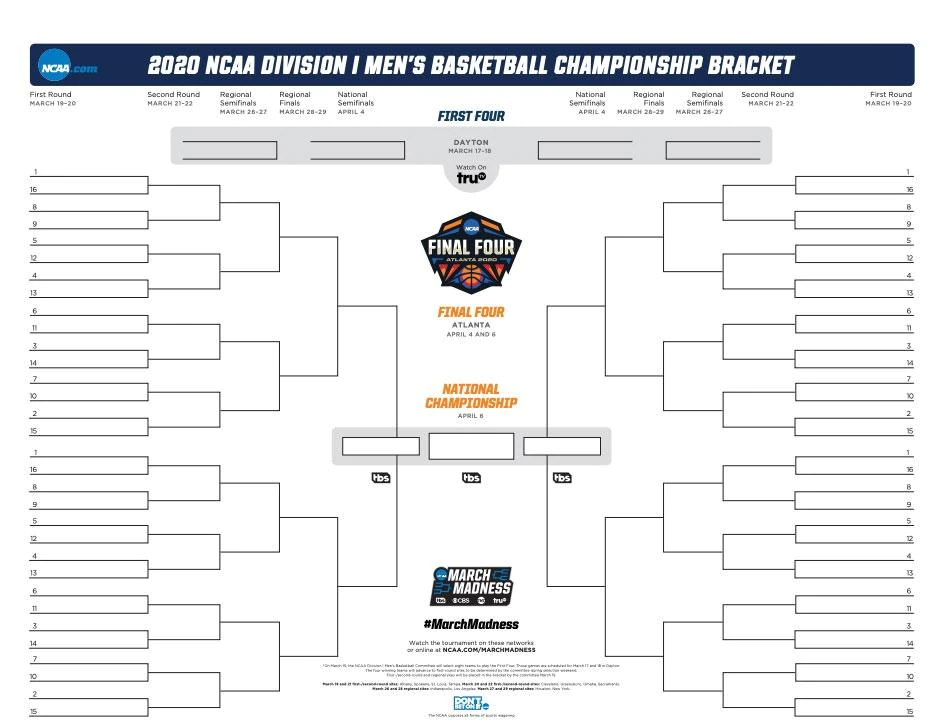

For example, Round 1 of Region W in Season A consists of following 8 matchups.

In [32]:
tourneySlots_df[(tourneySlots_df['Season'] == 1985) & (tourneySlots_df['Slot'].str.startswith('R1W'))]

,Season,Slot,Strongseed,Weakseed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12
5,1985,R1W6,W06,W11
6,1985,R1W7,W07,W10
7,1985,R1W8,W08,W09


## 7. Sample submission

In [33]:
sampleSubmission = get_data('sampleSubmission')

sampleSubmission_df (2278, 2)


,Id,Pred
0,2017_1112_1116,0.5
1,2017_1112_1124,0.5
2,2017_1112_1137,0.5
3,2017_1112_1139,0.5
4,2017_1112_1153,0.5


# Prepare season data

In [34]:
SEED_FACTOR=10 # so that 0 has much lower ranking than teams that were in the torney
def getSeasonData(team, year):
  # data for each game in a given year
  df_year = regularSeasonDetailedResults_df[regularSeasonDetailedResults_df.Season == year]
  # data for the team in that year
  df_team = df_year[(df_year.Wteam == team) | (df_year.Lteam == team)]

  # data for games won/lost in that year
  df_games_won = df_team[df_team.Wteam == team]
  df_games_lost = df_team[df_team.Lteam == team]

  numWins = len(df_games_won)
  wins = {'Wins': numWins}
  for col in ['Wscore', 'Wallow', 'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr',
         'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf']:
    col_ = col if col != 'Wallow' else 'Lscore'
    colTot = df_games_won[col_].sum()
    wins[col] = (colTot, colTot / numWins)

  numLoses = len(df_games_lost)  
  losses = {'Losses': numLoses}
  for col in ['Lscore', 'Lallow', 'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3',
         'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']:
    col_ = col if col != 'Lallow' else 'Wscore'
    colTot = df_games_lost[col_].sum()
    losses[col] = (colTot, colTot / numLoses) 

  numGames = numWins + numLoses
  games = {'Games': numGames}
  for col in ['Lscore', 'Lallow', 'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3',
         'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']:
    col_ = col[1:]
    colTot = wins['W' + col_][0] + losses[col][0]
    colAvg = colTot / numGames 
    games['G' + col_] = (colTot, colAvg)

  games_df = pd.DataFrame(games)
  games_df.drop(0, axis=0, inplace=True)
#  games_df['Team'] = team
  games_df['Games'] = numWins

  year = year - 1 ## prev year turney
  mask = (tourneySeeds_df.Season == year) & (tourneySeeds_df.Team == team)
  df_seed = tourneySeeds_df[mask]
  seed = 0 if len(df_seed) == 0 else int(df_seed.Seed.str[1:3])
  games_df['Seed'] = seed + SEED_FACTOR # so that 0 has much lower ranking than teams that were in the torney
  df = tourneyDetailedResults_df
  games_df['lastTourney'] = 1 if len(df[(df.Season==year) & ((df.Wteam == team) | (df.Lteam == team))]) > 0 else 0
  games_df['lastTourneyWins'] = len(df[(df.Season==year) & (df.Wteam == team)])
  games_df['prevTourneyWins'] = len(df[(df.Season < year) & (df.Wteam == team)])
  
  return games_df

In [35]:
#1401 2015 0       False
tourneySeeds_df[(tourneySeeds_df.Season == year-1) & (tourneySeeds_df.Team == 1401)]

,Season,Seed,Team


In [36]:
# test season vectore for a team = Oklahoma
getSeasonData(1328, 2016)

,Games,Gscore,Gallow,Gfgm,Gfga,Gfgm3,Gfga3,Gftm,Gfta,Gor,Gdr,Gast,Gto,Gstl,Gblk,Gpf,Seed,lastTourney,lastTourneyWins,prevTourneyWins
1,25,80.41,70.44,27.62,60.25,10.44,24.5,14.72,20.22,10.72,28.09,14.53,12.97,6.91,5.25,16.81,13,1,2,8


In [37]:
teams_df[teams_df.Team_Name.str.find('Kentu') >= 0]

,Team_Id,Team_Name
83,1184,E Kentucky
145,1246,Kentucky
196,1297,N Kentucky


In [38]:
# test season vectore for a team = Oklahoma
getSeasonData(1246, 2016)

,Games,Gscore,Gallow,Gfgm,Gfga,Gfgm3,Gfga3,Gftm,Gfta,Gor,Gdr,Gast,Gto,Gstl,Gblk,Gpf,Seed,lastTourney,lastTourneyWins,prevTourneyWins
1,26,79.68,68.26,28.56,59.68,6.94,18.74,15.62,22.85,12.88,25.71,14.41,11.0,5.62,5.65,20.47,11,1,4,27


## Compare 2 teams

In [39]:
def compareTwoTeams(team1, team2, year):
    df1 = getSeasonData(team1, year)
    df2 = getSeasonData(team2, year)
    return df1 - df2

In [40]:
compareTwoTeams(1328, 1246, 2016)

,Games,Gscore,Gallow,Gfgm,Gfga,Gfgm3,Gfga3,Gftm,Gfta,Gor,Gdr,Gast,Gto,Gstl,Gblk,Gpf,Seed,lastTourney,lastTourneyWins,prevTourneyWins
1,-1,0.73,2.17,-0.93,0.57,3.5,5.76,-0.9,-2.63,-2.16,2.39,0.12,1.97,1.29,-0.4,-3.66,2,0,-2,-19


## List of teams in 2016 tourney

In [41]:
def team_list():
  df = tourneyCompactResults_df
  sw = set(df[(df.Season==year)].Wteam)
  sl = set(df[(df.Season==year)].Lteam)
  teams_list = list(sw | sl)
  len(teams_list)

In [44]:
def compare_dict():
  eq = True
  for k, v in t_vectors.items():
    if k in teams_vectors:
      v1 = teams_vectors[k]
      if v1.equals(v):
        continue
      eq = False
      break
    else:
      eq = False
      break
  eq

# Prepare X

> We use the list of all the the games in the regular season and the tourney of the year before

> for each game, we calc the diff between the 2 vectors and add the Home feature (using the Wloc column) and the y (win or loss)

> We also create Loss records - to have **Negative Sampling**

In [170]:
#teams_vectors={}
if len(teams_vectors) == 0:
  teams_vectors = load_obj('teams_vectors')
p(len(teams_vectors))

season = regularSeasonCompactResults_df[(regularSeasonCompactResults_df.Season == year)]
tourney = tourneyCompactResults_df[tourneyCompactResults_df.Season == year - 1]

def create_X():
  X = pd.DataFrame()
  count = 0
  
  for arr in [season, tourney]:
    for index, row in arr.iterrows():
      teamW = row.Wteam
      teamL = row.Lteam 

      if not teamW in teams_vectors:
        teams_vectors[teamW] = getSeasonData(teamW, year)
      dfw = teams_vectors[teamW]

      if not teamL in teams_vectors:
        teams_vectors[teamL] = getSeasonData(teamL, year)
      dfl = teams_vectors[teamL]

      diff = dfw - dfl
      diff['Wloc'] = 1 if row.Wloc == 'H' else 0 if row.Wloc == 'N' else -1
      diff['Win'] = 1
      X = X.append(diff)
      
      diff = -diff
      diff['Win'] = 0
      X = X.append(diff)

      '''
      if count % 2 == 0:
        diff['Win'] = 1
      else:
        diff['Win'] = 0
        diff = -diff
      '''
      count += 1
  X.head()
  X.to_csv('NCAA.csv')
  save_obj(teams_vectors, 'teams_vectors')
  return X

351


In [113]:
X_full = create_X()
X_full.shape

(10872, 22)

# Prepare X_train, y_train

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def report(clf, X, y):
  acc = accuracy_score(y_true=y, y_pred=clf.predict(X))
  p('accuracy: {:.3f}\n'.format(acc))
  cm = pd.DataFrame(confusion_matrix(y_true=y, y_pred=clf.predict(X)),
                    index=clf.classes_,
                    columns=clf.classes_)
  d(cm)
  rep = classification_report(y_true=y, y_pred=clf.predict(X), zero_division=1)
  p('\n{}'.format(rep))
  return

In [109]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [114]:
from sklearn.model_selection import train_test_split

X = X_full.drop('Win', axis=1)
y = X_full.Win.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
model.fit(X_train, y_train)
report(model, X_train, y_train)

accuracy: 0.789



,0,1
0,2982,818
1,789,3021



              precision    recall  f1-score   support

           0       0.79      0.78      0.79      3800
           1       0.79      0.79      0.79      3810

    accuracy                           0.79      7610
   macro avg       0.79      0.79      0.79      7610
weighted avg       0.79      0.79      0.79      7610



In [116]:
report(model, X_test, y_test)

accuracy: 0.762



,0,1
0,1218,418
1,359,1267



              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1636
           1       0.75      0.78      0.77      1626

    accuracy                           0.76      3262
   macro avg       0.76      0.76      0.76      3262
weighted avg       0.76      0.76      0.76      3262



In [117]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)
report(model, X_train, y_train)
report(model, X_test, y_test)

accuracy: 0.789



,0,1
0,2982,818
1,789,3021



              precision    recall  f1-score   support

           0       0.79      0.78      0.79      3800
           1       0.79      0.79      0.79      3810

    accuracy                           0.79      7610
   macro avg       0.79      0.79      0.79      7610
weighted avg       0.79      0.79      0.79      7610

accuracy: 0.762



,0,1
0,1218,418
1,359,1267



              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1636
           1       0.75      0.78      0.77      1626

    accuracy                           0.76      3262
   macro avg       0.76      0.76      0.76      3262
weighted avg       0.76      0.76      0.76      3262



## Predict a game

In [101]:
def predictGame(team1, team2, home=0):
  diff = teams_vectors[team1] - teams_vectors[team2]
  diff['Wloc'] = home
  d(diff)
  p(model.predict(diff)[0])
  p(model.predict_proba(diff))

In [93]:
team1 = teams_df[teams_df.Team_Name.str.find('North Carolina') >= 0].Team_Id.values[0]
team2 = teams_df[teams_df.Team_Name.str.find('Villanova') >= 0].Team_Id.values[0]
team1, team2
diff = teams_vectors[team1] - teams_vectors[team2]
diff['Wloc'] = 0
d(diff)
p(model.predict(diff)[0])
model.predict_proba(diff)

,Games,Gscore,Gallow,Gfgm,Gfga,Gfgm3,Gfga3,Gftm,Gfta,Gor,...,Gast,Gto,Gstl,Gblk,Gpf,Seed,lastTourney,lastTourneyWins,prevTourneyWins,Wloc
1,-1,5.29,5.85,4.18,7.38,-3.18,-7.76,0.12,1.21,4.76,...,1.97,-0.21,0.15,0.97,0.38,3,0,1,16,0


1


array([0.45124748, 0.54875252])

In [94]:
tourney2016 = tourneyCompactResults_df[tourneyCompactResults_df.Season == year]
tourney2016

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
1983,2016,134,1195,96,1192,65,N,0
1984,2016,134,1455,70,1435,50,N,0
1985,2016,135,1221,59,1380,55,N,0
1986,2016,135,1276,67,1409,62,N,0
1987,2016,136,1114,85,1345,83,N,2
...,...,...,...,...,...,...,...,...
2045,2016,146,1314,88,1323,74,N,0
2046,2016,146,1393,68,1438,62,N,0
2047,2016,152,1314,83,1393,66,N,0
2048,2016,152,1437,95,1328,51,N,0


In [120]:
predictGame(1192, 1195)

,Games,Gscore,Gallow,Gfgm,Gfga,Gfgm3,Gfga3,Gftm,Gfta,Gor,...,Gast,Gto,Gstl,Gblk,Gpf,Seed,lastTourney,lastTourneyWins,prevTourneyWins,Wloc
1,1,1.25,5.65,-0.53,0.58,2.19,5.25,0.12,-1.51,-0.9,...,1.2,1.0,1.22,-1.52,1.96,0,0,0,-2,0


0
[[0.5602364 0.4397636]]


In [119]:
predictGame(1195, 1192)

,Games,Gscore,Gallow,Gfgm,Gfga,Gfgm3,Gfga3,Gftm,Gfta,Gor,...,Gast,Gto,Gstl,Gblk,Gpf,Seed,lastTourney,lastTourneyWins,prevTourneyWins,Wloc
1,-1,-1.25,-5.65,0.53,-0.58,-2.19,-5.25,-0.12,1.51,0.9,...,-1.2,-1.0,-1.22,1.52,-1.96,0,0,0,2,0


1
[[0.45420515 0.54579485]]


In [184]:
result_df = pd.DataFrame()
for arr in [season]:#, tourney]:
  for index, row in arr.iterrows():
    teamW = row.Wteam
    teamL = row.Lteam 

    diff = teams_vectors[team1] - teams_vectors[team2]
    diff['Wloc'] = 1 if row.Wloc == 'H' else 0 if row.Wloc == 'N' else -1
    result = pd.DataFrame(model.predict_proba(diff))
    result['Teams'] = f'{teamW}_{teamL}'
    result_df = result_df.append(result)

    diff = -diff
    result = pd.DataFrame(model.predict_proba(diff))
    result['Teams'] = f'{teamL}_{teamW}'
    result_df = result_df.append(result)
    
d(result_df)

,0,1,Teams
0,0.29,0.71,1104_1244
0,0.72,0.28,1244_1104
0,0.71,0.29,1105_1408
0,0.33,0.67,1408_1105
0,0.29,0.71,1112_1334
...,...,...,...
0,0.57,0.43,1401_1246
0,0.44,0.56,1277_1345
0,0.57,0.43,1345_1277
0,0.44,0.56,1386_1433


In [185]:
result_df.shape

(10738, 3)

# Project Shufersal

In [136]:
df_.to_csv('shufersal.csv')

In [137]:
df_.head()

,OrderNumbert,HouseHoldID,TransactionDate,DepartmentCode,DepartmentName,CategoryCode,CategoryName,GroupCode,GroupName,SubGroupCode,...,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSusb,CorrelateItemStatusCode
0,40063,1,2021-02-21,10,10-מזון יבש,6,מתוקים,700,חטיפים מתוקים,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,15636,2,2021-03-21,10,10-מזון יבש,6,מתוקים,699,טבלאות שוקולד,4,...,51.0,NaN,5.3,31.0,19.2,0.5,NaN,NaN,12.25,1
2,40686,3,2021-01-07,10,10-מזון יבש,6,מתוקים,699,טבלאות שוקולד,3,...,51.0,21.0,6.5,30.0,18.0,0.5,7.5,7.8,12.00,0
3,29327,4,2021-01-28,10,10-מזון יבש,6,מתוקים,699,טבלאות שוקולד,2,...,64.2,132.0,8.1,24.1,14.9,0.5,8.0,NaN,12.50,1
4,32055,5,2021-02-04,10,10-מזון יבש,6,מתוקים,699,טבלאות שוקולד,3,...,23.0,10.0,8.7,50.0,30.0,0.5,NaN,13.0,4.50,1


In [186]:
df_ = pd.read_csv('shufersal.csv', index_col=False, usecols=[i for i in range(61) if not i in[0,5,7,9,11,13,15,17,33,35,37,39,41,43,45]])
df_.T

,0,1,2,3,4,5,6,7,8,9,...,54474,54475,54476,54477,54478,54479,54480,54481,54482,54483
OrderNumbert,40063,15636,40686,29327,32055,32055,22001,22001,41258,41945,...,19978,19978,20083,17208,20,19,18,17,16,16313
HouseHoldID,1,2,3,4,5,5,5,5,6,6,...,33488,33488,33489,33490,33490,33490,33490,33490,33490,33490
TransactionDate,2021-02-21,2021-03-21,2021-01-07,2021-01-28,2021-02-04,2021-02-04,2021-01-11,2021-01-11,2021-01-19,2021-02-10,...,2021-03-31,2021-03-31,2021-03-31,2021-03-23,2021-02-21,2021-02-14,2021-02-11,2021-02-04,2021-02-04,2021-03-22
DepartmentCode,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
CategoryCode,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
GroupCode,700,699,699,699,699,690,699,699,653,699,...,699,699,700,699,702,702,702,702,702,699
SubGroupCode,3,4,3,2,3,3,3,3,2,3,...,2,2,3,1,3,3,3,3,3,4
CompoundID,-8000500249352,2900,12043,8579,30727,22893,6017,6017,8433,12043,...,7215,7215,8859,23769,-7622210597915,-7622210597915,-7622210597915,-7622210597915,-7622210597915,-3144600
ParentProductNumber,8000500249352,178134,7610400091060,7290112490124,7296073382416,40000514480,7290112349668,7290112349668,6681553,3046920029780,...,4025700001023,7622300495046,7290107951579,170053,7622210597915,7622210597915,7622210597915,7622210597915,7622210597915,3144600
BrandIndDesc,קינדר,פרה,לינדט,קליק,שופרסל,M&M,ספלנדיד,ספלנדיד,שטראוס,לינדט,...,מילקה,מילקה,עלית,פרה,מילקה,מילקה,מילקה,מילקה,מילקה,צ'וקטה


In [187]:
df_.to_csv('shufersal_mod.csv')